# Análisis de Calidad del Aire en Colombia
Este cuaderno detalla el proceso de carga, limpieza y análisis de datos relacionados con la calidad del aire en diferentes regiones de Colombia.

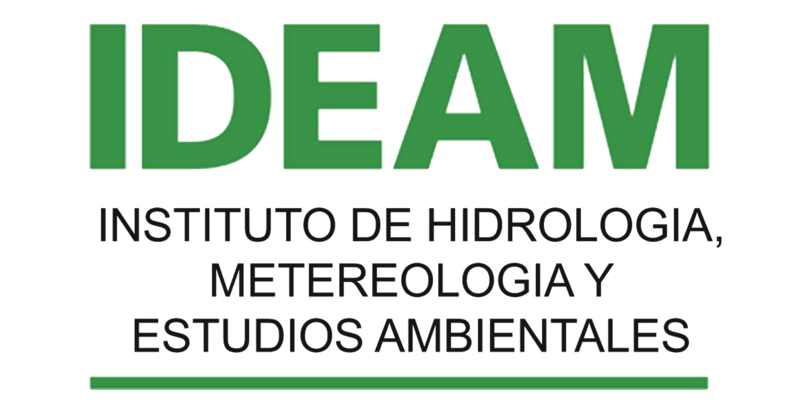
Datos de Calidad de aire (Inmisión) y variables climatológicas, reportadas por las Autoridades Ambientales al SISAIRE ( Subsistema de Información de la Calidad del Aire) durante los años 2011 - 2017.

Puedes revisar mas información acerca de este dataset en la siguiente página https://www.datos.gov.co/login y la documentación aquí: http://sisaire.ideam.gov.co/ideam-sisaire-web/publicaciones.xhtml?clase=DOCUMENTOS.

Fuente: https://www.kaggle.com/datasets/pancachocaliente/calidad-del-aire-en-colombia

## 1. Carga de Datos
Se comienza cargando los datos de sensores de calidad del aire proporcionados en un archivo CSV.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pancachocaliente/calidad-del-aire-en-colombia")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\frany\.cache\kagglehub\datasets\pancachocaliente\calidad-del-aire-en-colombia\versions\1


Descargar la base de datos y almacenar en una carpeta

In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar los datos
file_path = 'C:/Users/frany/.cache/kagglehub/datasets/pancachocaliente/calidad-del-aire-en-colombia/versions/1/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240311.csv'
data = pl.read_csv(file_path)

# Mostrar las primeras filas
data.head()

C:\Users\frany\AppData\Local\Temp\ipykernel_13784\2235742378.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"
1,13/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)"
2,15/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)"
3,18/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)"
4,20/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)"


## 2. Exploración Inicial de los Datos
Se examinan las dimensiones del conjunto de datos y se identifican valores nulos, duplicados y tipos de datos.

In [3]:
# Dimensiones y tipos de datos
print(data.info())

# Valores nulos
print(data.isnull().sum())

# Duplicados
print(f"Duplicados: {data.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20389245 entries, 0 to 20389244
Data columns (total 16 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Fecha                           object 
 1   Autoridad Ambiental             object 
 2   Nombre de la estación           object 
 3   Tecnología                      object 
 4   Latitud                         float64
 5   Longitud                        float64
 6   Código del departamento         float64
 7   Departamento                    object 
 8   Código del municipio            float64
 9   Nombre del municipio            object 
 10  Tipo de estación                object 
 11  Tiempo de exposición            int64  
 12  Variable                        object 
 13  Unidades                        object 
 14  Concentración                   float64
 15  Nueva columna georreferenciada  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 2.4+ GB
None
Fecha  

## 3. Limpieza de Datos
En esta sección se manejan valores nulos, se corrigen inconsistencias en los datos y se transforman columnas clave para el análisis.

In [12]:
# Eliminar duplicados
data = data.drop_duplicates()

# Manejo de valores nulos
data = data.dropna()

# Corrección de formatos de columnas
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')

# Filtrar filas con fechas válidas
data = data[data['Fecha'].notnull()]

# Inspeccionar nuevamente
print(data.info())

C:\Users\frany\AppData\Local\Temp\ipykernel_13784\1083294951.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 15657049 entries, 0 to 15668992
Data columns (total 16 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Fecha                           datetime64[ns]
 1   Autoridad Ambiental             object        
 2   Nombre de la estación           object        
 3   Tecnología                      object        
 4   Latitud                         float64       
 5   Longitud                        float64       
 6   Código del departamento         float64       
 7   Departamento                    object        
 8   Código del municipio            float64       
 9   Nombre del municipio            object        
 10  Tipo de estación                object        
 11  Tiempo de exposición            int64         
 12  Variable                        object        
 13  Unidades                        object        
 14  Concentración                   float64       
 15  N

## 4. Transformación de Datos
Se generan columnas adicionales para facilitar el análisis, como mes, año y región.

In [13]:
# Agregar columnas adicionales
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['Región'] = data['Departamento'] + ' - ' + data['Nombre del municipio']

# Verificar las nuevas columnas
data.head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada,Año,Mes,Región
0,2011-09-04,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)",2011,9,ANTIOQUIA - BARBOSA
1,2011-04-13,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)",2011,4,ANTIOQUIA - BARBOSA
2,2011-04-15,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)",2011,4,ANTIOQUIA - BARBOSA
3,2011-04-18,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)",2011,4,ANTIOQUIA - BARBOSA
4,2011-04-20,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)",2011,4,ANTIOQUIA - BARBOSA


## 5. Análisis de Datos
Se realiza un análisis exploratorio para identificar patrones, tendencias y posibles problemas de calidad del aire por región y año.

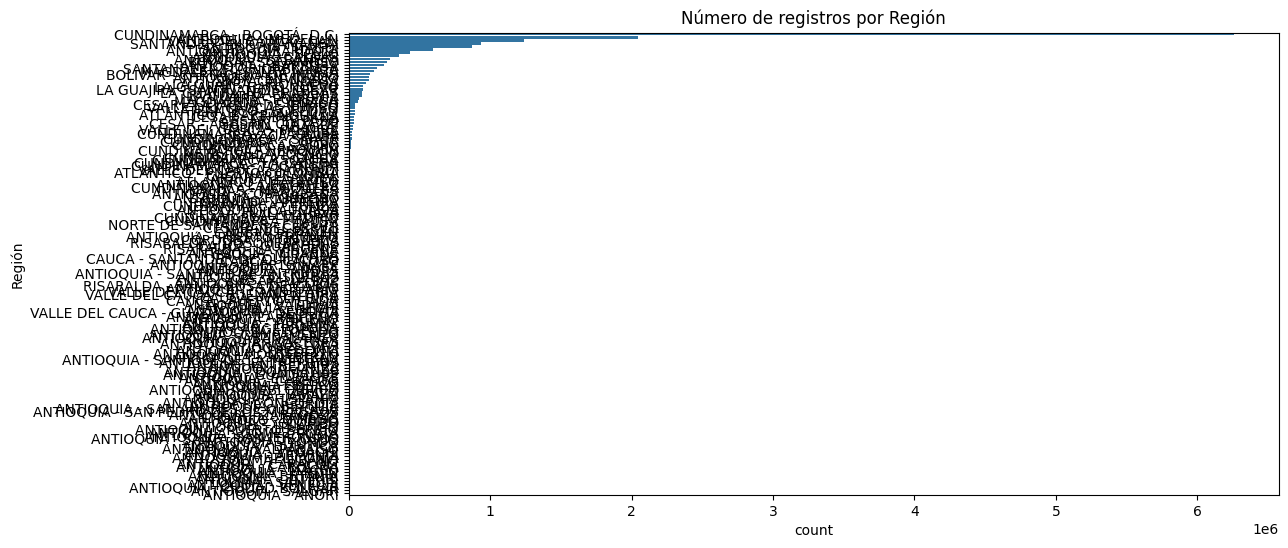

C:\Users\frany\AppData\Local\Temp\ipykernel_13784\950290419.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Año', palette='viridis')


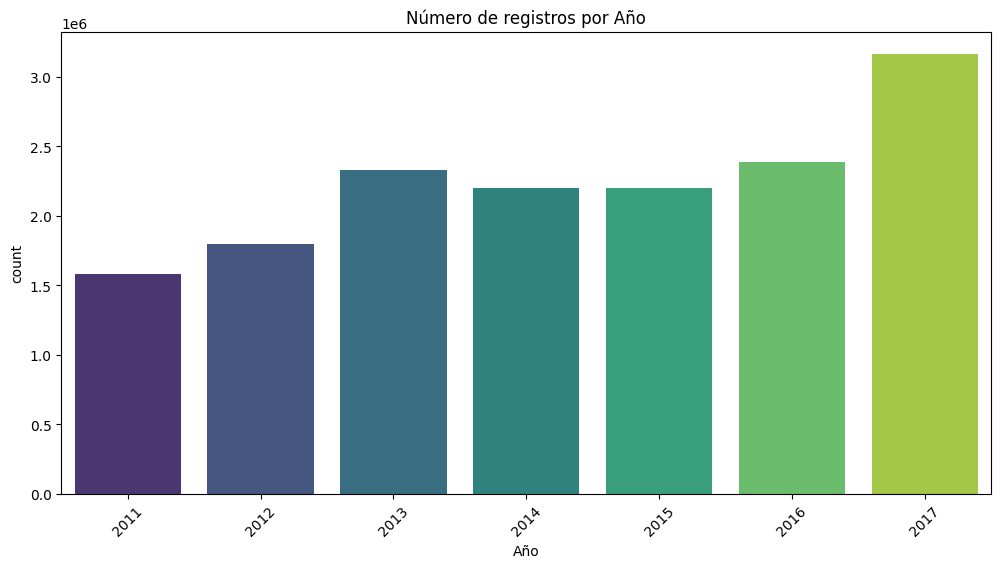

In [14]:
# Análisis por regiones
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Región', order=data['Región'].value_counts().index)
plt.title('Número de registros por Región')
plt.show()

# Análisis por años
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Año', palette='viridis')
plt.title('Número de registros por Año')
plt.xticks(rotation=45)
plt.show()

## 6. Generación de Informe con Sweetviz
Se utiliza la biblioteca Sweetviz para generar un informe detallado de los datos en formato HTML.

In [15]:
import sweetviz as sv

# Crear el informe
reporte = sv.analyze(data)

# Guardar el informe como HTML
reporte.show_html('./report/informe_calidad_aire.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ./report/informe_calidad_aire.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 7. Conclusiones
Se detallan los principales hallazgos del análisis de calidad del aire en las diferentes regiones de Colombia.